In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from dateutil import parser 
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("Data/train_processed.csv")

In [51]:
data.head()

,id,title,item_condition,item_type,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,Beauty/Makeup/Lips,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,0
1,1334924,Uywdry utrcq,2,Electronics/Cameras & Photography/Camera & Pho...,3.0,1,Iwbcq Gsouy uywdry utrcq. Yltyxnbiwy. Fwozu rx...,5.198556,18,3,0,147631,0
2,215759,Tbxzyprxy Issq,3,Other/Books/Literature & Fiction,7.0,1,FPRCY DRPA XS WYUU Tbxzyprxy ig Ynjbpn Iwssp P...,8.351304,18,5,0,1266811,0
3,964284,Cpyj xycq,3,Women/Sweaters/Crewneck,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,0
4,1159166,UOFYPUBWY 2016 XYJ IWOYTSSTM UABPT JBTCM,1,Electronics/Cell Phones & Accessories/Cell Pho...,28.0,1,* Xyj 100% rx Pytbrw Isl * Mrzm-vobwrtg abny *...,3.674306,56,2,0,323393,0


In [25]:
print(data.shape)
data.size

(1482535, 14)


20755490

In [50]:
#tarnsforming the approved_poste column using integer encoding
data.approved_poster = data.approved_poster.apply(lambda x: 1 if x == True else 0)

In [4]:
#descriptive statistic of dataset
data.describe()

,id,item_condition,price,shipping_category,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01,5.163722e+01,2.500217e+01,4.002040e+00,9.982631e-02,7.412920e+05
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01,2.099458e+02,1.802960e+01,1.414320e+00,2.997684e-01,4.279711e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.725540e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00,3.868460e+00,1.000000e+01,3.000000e+00,0.000000e+00,3.706620e+05
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00,1.217400e+01,2.100000e+01,4.000000e+00,0.000000e+00,7.412920e+05
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00,3.838470e+01,3.600000e+01,5.000000e+00,0.000000e+00,1.111924e+06
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00,4.770192e+04,1.620000e+02,8.000000e+00,1.000000e+00,1.482568e+06


In [5]:
#exploring the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 14 columns):
id                       1482535 non-null int64
title                    1482535 non-null object
item_condition           1482535 non-null int64
item_type                1476208 non-null object
item_brand               849853 non-null object
price                    1482535 non-null float64
shipping_category        1482535 non-null int64
description              1482531 non-null object
item_characteristic_n    1482535 non-null float64
item_characteristic_p    1482535 non-null int64
item_origin              1482535 non-null int64
item_flag_available      1482535 non-null int64
post_stats               1482535 non-null int64
approved_poster          1482535 non-null bool
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 148.5+ MB


In [6]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [7]:
check_missing_data(data)

,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
Total,0,0,0,6327,632682,0,0,4,0,0,0,0,0,0
Percent,0,0,0,4.26769e-05,0.00426757,0,0,2.69808e-08,0,0,0,0,0,0
Types,int64,object,int64,object,object,float64,int64,object,float64,int64,int64,int64,int64,bool


In [16]:
#How many missing values do we have in our dataset
data.isnull().sum()

id                            0
title                         0
item_condition                0
item_type                  6327
item_brand               632682
price                         0
shipping_category             0
description                   4
item_characteristic_n         0
item_characteristic_p         0
item_origin                   0
item_flag_available           0
post_stats                    0
approved_poster               0
dtype: int64

In [24]:
data.item_brand.value_counts()

FRXQ                    54088
Xrqy                    54043
Hrctsprb'u Uycpyt       48036
WoWbPsy                 31024
Bffwy                   17322
DSPYHYP 21              15186
Xrxtyxns                15007
Wowowyasx               14558
Arcmbyw Qspu            13928
Bayprcbx Ybzwy          13254
Pby Noxx                12305
Uyfmspb                 12172
Csbcm                   10463
Nruxyg                  10360
Ibtm & Isng Jspqu       10354
Bnrnbu                  10202
Doxqs                    9237
Oxnyp Bpasop             8461
Usxg                     7994
Swn Xbhg                 7567
Mswwrutyp                6948
Cbptyp'u                 6385
Opibx Nycbg              6210
Tmy Xsptm Dbcy           6172
Rxnyfyxnyxt              5902
Tss Dbcyn                5794
Lisl                     5709
Ipbxng Aywhrwwy          5680
Qbty Ufbny               5411
ABC                      5302
                        ...  
Msshyp                      1
Dspycbutyp sd Isutsx        1
Bumwyg Zpb

In [21]:
data[data['item_type'].isna()]

,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
166,446550,Rxts Tmy Jrwn (Issq),3,NaN,NaN,9.0,0,Rxts Tmy Jrwn ig Ksx Qpbqboyp. Fbfypibcq issq ...,19.660352,12,3,0,1036015,False
881,565904,Xyj Spwybxu Ubrxtu cswwyctsp uyt,1,NaN,NaN,22.0,0,Tmru cswwyctsp uyt rxcwonyu b fypusxbw qxrdy b...,9.571397,6,4,0,916653,False
1204,981378,Ioxnwy Dsp Jbtt,3,NaN,Xrqy,53.0,0,Ioxnwy bd1 iwbcq zoa isttsa 10.5 bxn pyn uswbp 10,43.526529,24,4,0,501196,True
1713,951661,ABC jbtypjyrzmt dsoxnbtrsx,2,NaN,ABC Csuaytrcu,26.0,0,Ouyn SXCY bxn pybwreyn rtu xst ag umbny. Tmy u...,517.520778,72,5,0,530897,False
2009,1322904,***IOXNWY DSP CGXTMRB***,4,NaN,NaN,18.0,0,Xs nyucprftrsx gyt,161.984399,16,6,0,159669,False
2434,384921,Xyhyp Iyyx Ouyn Zwshyu FYWBZRC,1,NaN,NaN,19.0,0,Ouobwwg zsyu dsp [pa] b fbrp!!! Uywwrxz istm f...,108.192034,14,4,0,1097646,True
2537,717429,Kyuurcb Urafusx fypdoay,3,NaN,Kyuurcb Urafusx,14.0,0,Ouyn dyj trayu Abqy sddypu bxn ioxnwy UBWY!!! ...,6.381458,81,3,0,765132,False
2617,1031184,Aoutywb ubafwyu,2,NaN,Aoutywb,3.0,1,Xyhyp sfyxyn. Dpyy fprcy kout cshypu umrffrxz ...,18.825016,30,4,0,451362,True
3061,271199,Ibtabx hu uofypabx Xycqwbcy,1,NaN,NaN,17.0,1,Xycqwbcy Tgfy: Cmbrxu Xycqwbcyu Csafbtrirwrtg:...,24.807599,35,6,0,1211372,False
3099,900244,Urey Uabww Nszzry Sotdrt Xbhg Ubrwsp U,2,NaN,NaN,8.0,0,Urey Uabww Nszzry Sotdrt Xbhg. Ubrwsp nsz sotd...,14.065324,49,4,0,582308,False


In [26]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
item_brand,632682,42.675687
item_type,6327,0.426769
description,4,0.000270
approved_poster,0,0.000000
post_stats,0,0.000000
item_flag_available,0,0.000000
item_origin,0,0.000000
item_characteristic_p,0,0.000000
item_characteristic_n,0,0.000000
shipping_category,0,0.000000


From the above missing data analysis we observed the varaible <strong>item_brand </strong> has a lot of missing iformation, <strong>42% of the data set with 632682 </strong>. I decided to drop the feature since it is a categorical variable with very high cardinality.

In the case <strong> item_type and description</strong> since only <strong> 0.42% and 0.00027% respectively</strong> of the observation are missing I decided to delete the observations and keep the varaibles.

In [27]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 6327]).index,1)
data = data.drop(data.loc[data['item_type'].isnull()].index)
data = data.drop(data.loc[data['description'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [45]:
#lets determing which features are quatitative or Qualitavie
quantitative = [f for f in data.columns if data.dtypes[f] != 'object' and data.dtypes[f] != "bool"]
quantitative.remove('price')
quantitative.remove('id')
qualitative = [f for f in data.columns if data.dtypes[f] == 'object'or data.dtypes[f] == "bool"]

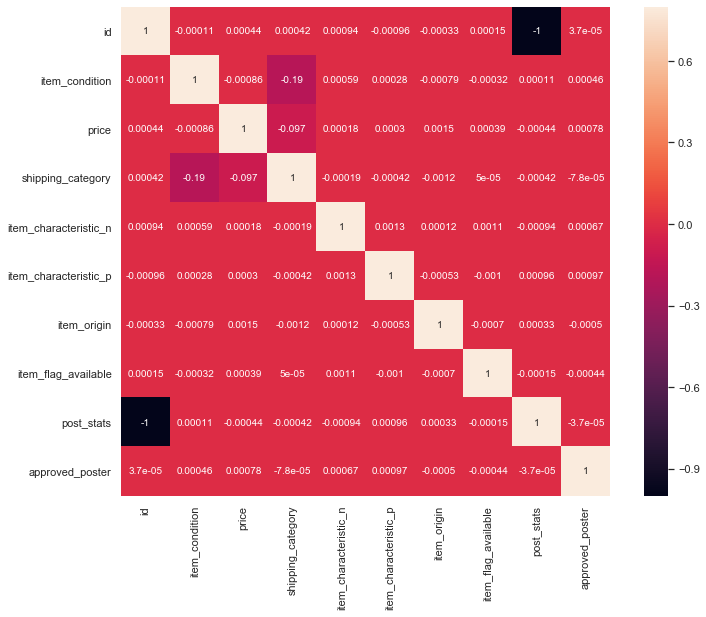

In [30]:
#Data Exploration
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

As we observe from the correlation matrix no two continous variable are highly correlated and as such we dont have to worry about <strong> co-linearity </strong>

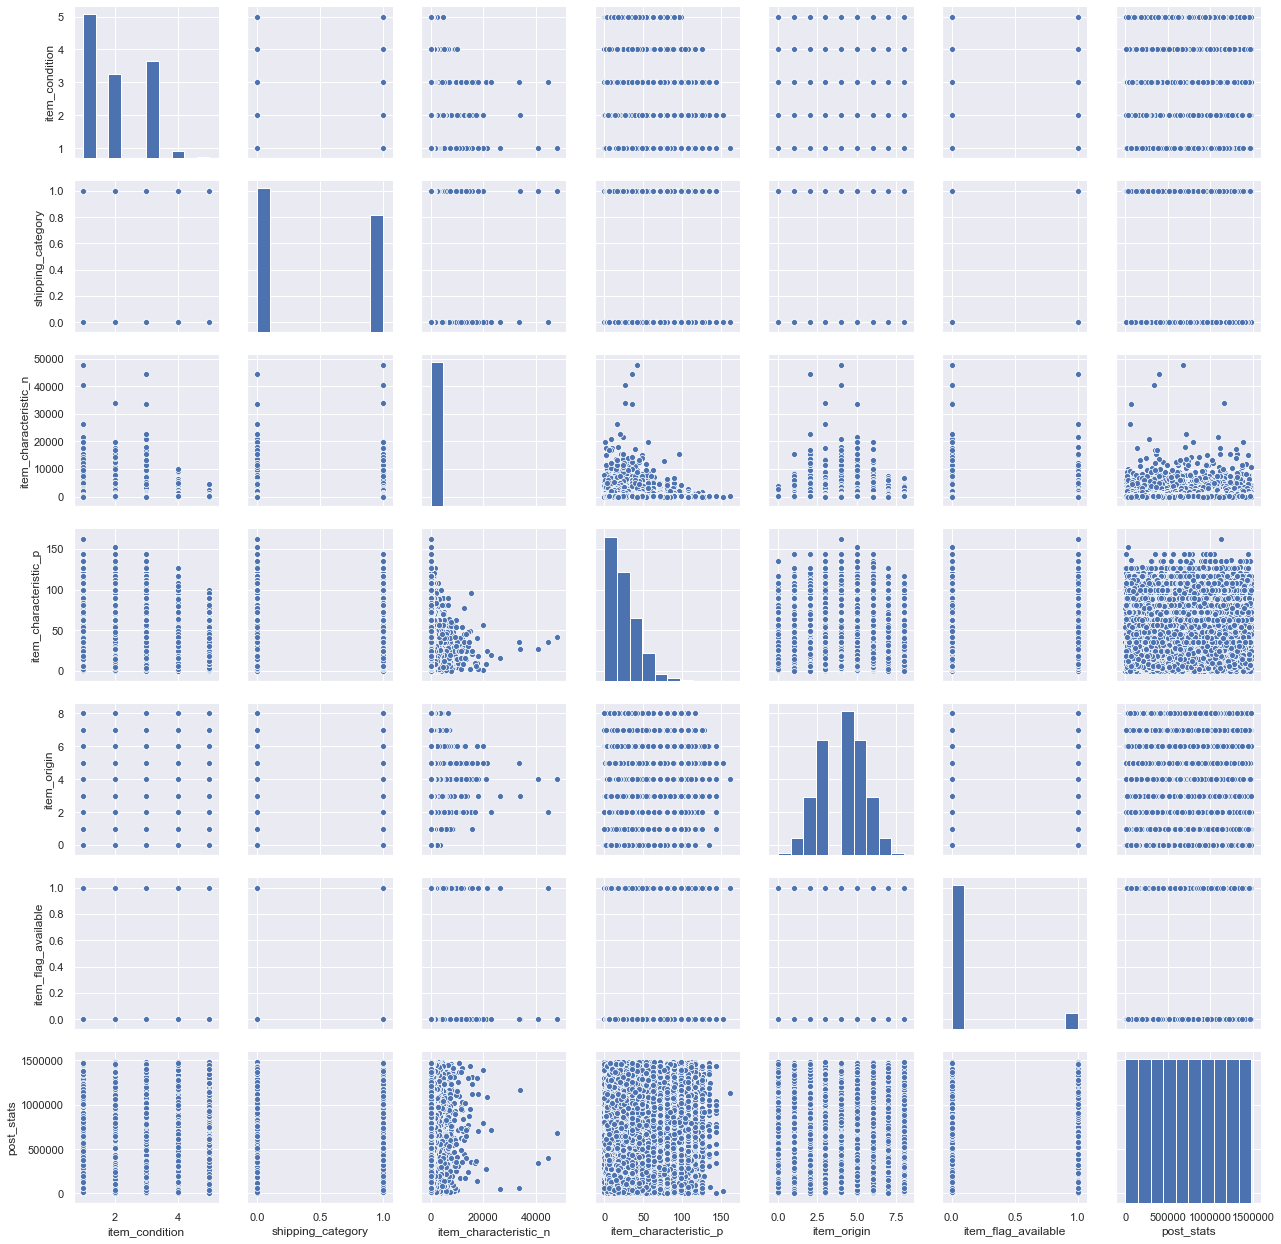

In [48]:
#pairplot
sns.set()
cols = quantitative
sns.pairplot(data[cols], size =2.5)
plt.show()

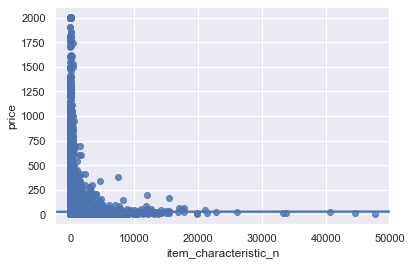

In [4]:
sns.regplot(x=data.item_characteristic_n, y=data.price)

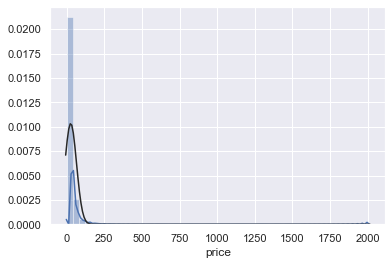

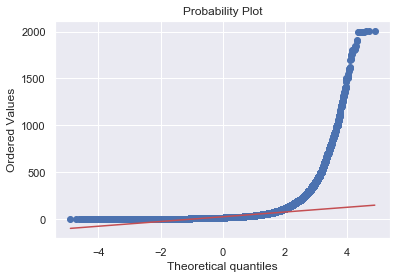

In [56]:
#Perform some statisticall analysis
#histogram and normal probability plot
sns.distplot(data['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [ ]:
#applying log transformation
data.price = np.log(data.price)

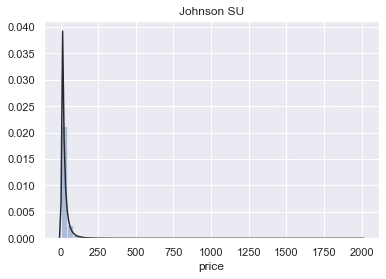

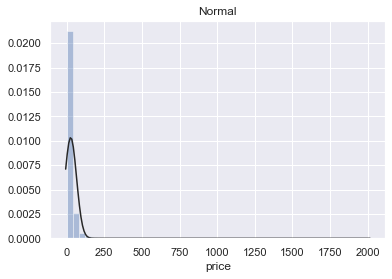

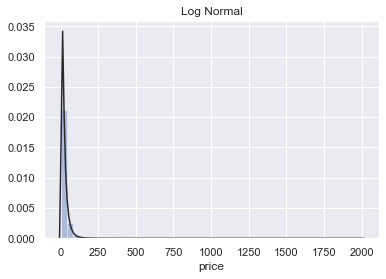

In [57]:
y = data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [58]:
x = np.log(data.price)

In [77]:

x[np.isneginf(x)] = 0

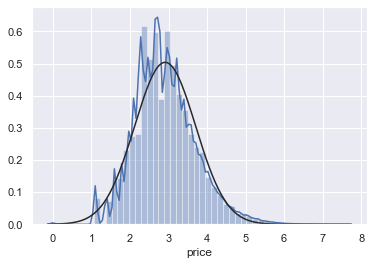

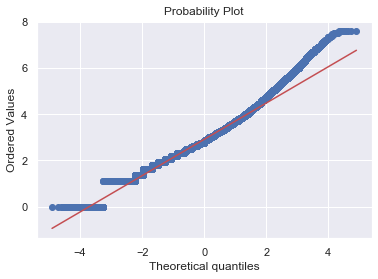

In [78]:
sns.distplot(x, fit=norm);
fig = plt.figure()
res = stats.probplot(x, plot=plt)

In [81]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [100]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
# create a log transformer
transformer = FunctionTransformer(np.log, validate=True)
# transform all the numerical and positive variables
data_t = transformer.transform(np.array(data['price']).reshape(1,-1))
# Scikit-learn returns NumPy arrays, so capture in dataframe
# note that Scikit-learn will return an array with
# only the columns indicated in cols
data_t = pd.DataFrame(np.transpose(data_t),columns = ['price'])
data_t = data_t.fillna(1, inplace = True)

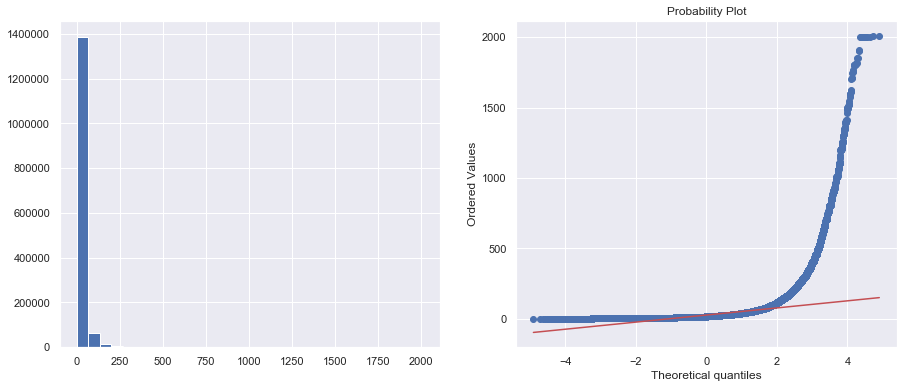

In [ ]:
cols = ['price']
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# learn the lambda from the train set
transformer.fit(data[cols].fillna(1))

# transform the data
data_t = transformer.transform(data[cols].fillna(1))

# capture data in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

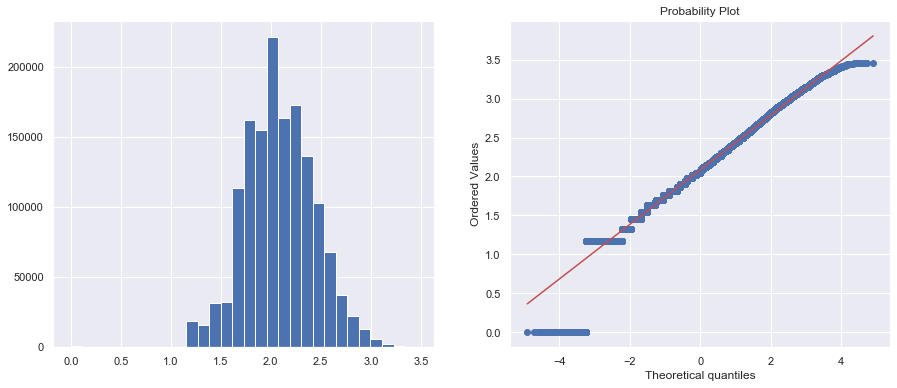

In [113]:
diagnostic_plots(data_t, 'price')

In [133]:
from sklearn.preprocessing import QuantileTransformer
data_t = data['price']
Transformer = QuantileTransformer(output_distribution='normal',random_state=42)
data_t = Transformer.fit_transform(np.array(data_t).reshape(-1,1))
data_t = np.ravel(data_t)

In [134]:

data_tdf = pd.DataFrame(data_t, columns = cols)

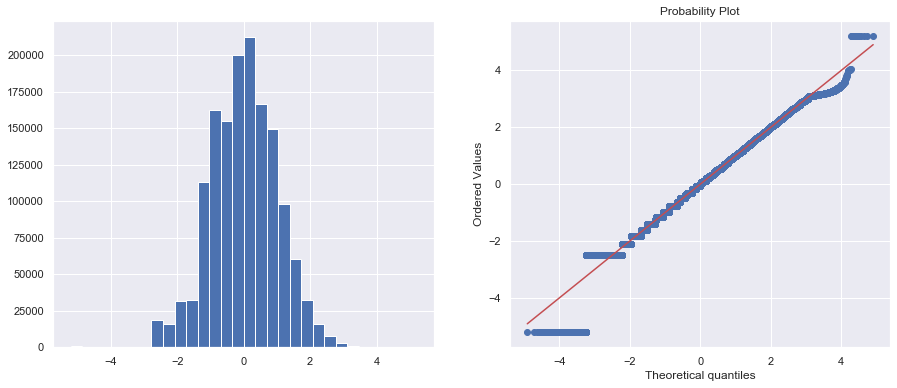

In [135]:
diagnostic_plots(data_tdf, 'price')

In [122]:
data.isna().sum()

id                       0
title                    0
item_condition           0
item_type                0
price                    0
shipping_category        0
description              0
item_characteristic_n    0
item_characteristic_p    0
item_origin              0
item_flag_available      0
post_stats               0
approved_poster          0
dtype: int64

In [124]:
#feature engineering
data.head()

,id,title,item_condition,item_type,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,Beauty/Makeup/Lips,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,0
1,1334924,Uywdry utrcq,2,Electronics/Cameras & Photography/Camera & Pho...,3.0,1,Iwbcq Gsouy uywdry utrcq. Yltyxnbiwy. Fwozu rx...,5.198556,18,3,0,147631,0
2,215759,Tbxzyprxy Issq,3,Other/Books/Literature & Fiction,7.0,1,FPRCY DRPA XS WYUU Tbxzyprxy ig Ynjbpn Iwssp P...,8.351304,18,5,0,1266811,0
3,964284,Cpyj xycq,3,Women/Sweaters/Crewneck,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,0
4,1159166,UOFYPUBWY 2016 XYJ IWOYTSSTM UABPT JBTCM,1,Electronics/Cell Phones & Accessories/Cell Pho...,28.0,1,* Xyj 100% rx Pytbrw Isl * Mrzm-vobwrtg abny *...,3.674306,56,2,0,323393,0


In [126]:
#split the item_type column into 3 seperate categories
new = data['item_type'].str.split("/", n = 2, expand = True)

In [128]:
data['item_type_a'] = new[0]
data['item_type_b'] = new[1]
data['item_type_c'] = new[2]
data.drop(columns = ['item_type'], inplace = True )

In [129]:
data.head()


,id,title,item_condition,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster,item_type_a,item_type_b,item_type_c
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,0,Beauty,Makeup,Lips
1,1334924,Uywdry utrcq,2,3.0,1,Iwbcq Gsouy uywdry utrcq. Yltyxnbiwy. Fwozu rx...,5.198556,18,3,0,147631,0,Electronics,Cameras & Photography,Camera & Photo Accessories
2,215759,Tbxzyprxy Issq,3,7.0,1,FPRCY DRPA XS WYUU Tbxzyprxy ig Ynjbpn Iwssp P...,8.351304,18,5,0,1266811,0,Other,Books,Literature & Fiction
3,964284,Cpyj xycq,3,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,0,Women,Sweaters,Crewneck
4,1159166,UOFYPUBWY 2016 XYJ IWOYTSSTM UABPT JBTCM,1,28.0,1,* Xyj 100% rx Pytbrw Isl * Mrzm-vobwrtg abny *...,3.674306,56,2,0,323393,0,Electronics,Cell Phones & Accessories,Cell Phone Accessories


In [130]:
data.columns

Index(['id', 'title', 'item_condition', 'price', 'shipping_category',
       'description', 'item_characteristic_n', 'item_characteristic_p',
       'item_origin', 'item_flag_available', 'post_stats', 'approved_poster',
       'item_type_a', 'item_type_b', 'item_type_c'],
      dtype='object')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476204 entries, 0 to 1482534
Data columns (total 15 columns):
id                       1476204 non-null int64
title                    1476204 non-null object
item_condition           1476204 non-null int64
price                    1476204 non-null float64
shipping_category        1476204 non-null int64
description              1476204 non-null object
item_characteristic_n    1476204 non-null float64
item_characteristic_p    1476204 non-null int64
item_origin              1476204 non-null int64
item_flag_available      1476204 non-null int64
post_stats               1476204 non-null int64
approved_poster          1476204 non-null int64
item_type_a              1476204 non-null object
item_type_b              1476204 non-null object
item_type_c              1476204 non-null object
dtypes: float64(2), int64(8), object(5)
memory usage: 180.2+ MB


In [193]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
features=data[['item_condition', 'shipping_category'
       , 'item_characteristic_n', 'item_characteristic_p',
       'item_origin', 'item_flag_available', 'approved_poster'
       ]]
target = data[['price']]
features=pd.get_dummies(features)
feature_names = list(features.columns)
X_train, X_test, y_train, y_test = train_test_split(
    features,data_tdf, test_size = 0.3, random_state = 42)

MemoryError: 

In [176]:
features.head()

,item_condition,shipping_category,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1,1,10.138889,48,4,0,22976,0
1,2,1,5.198556,18,3,0,147631,0
2,3,1,8.351304,18,5,0,1266811,0
3,3,1,6.849827,16,7,0,518287,0
4,1,1,3.674306,56,2,0,323393,0


In [177]:
data_tdf.head()

,price
0,-0.393847
1,-2.483413
2,-1.381364
3,-0.768075
4,0.616541


In [148]:
gb = GradientBoostingRegressor(n_estimators=2000,max_depth=100,
                               random_state=42, verbose=False,max_features='auto')


In [149]:
gb.fit(train_features, train_labels)


KeyboardInterrupt: 

In [ ]:
predictionsgb = gb.predict(test_features)  
predictionsgb=Transformer.inverse_transform(np.array(predictionsgb).reshape(-1,1))
predictionsgb=np.ravel(predictionsgb)

test_labels=Transformer.inverse_transform(np.array(test_labels).reshape(-1,1))
test_labels=np.ravel(test_labels)

In [164]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [158]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [189]:

model_LinearReg = LinearRegression()
model_LinearReg.fit(X_train, y_train)
rmse_LinearReg = rmse_cv(model_LinearReg).mean()
rmse_LinearReg

0.9665020189811614

In [190]:
model_lassoCV =  LassoCV()
model_lassoCV.fit(X_train,y_train)
rmse_lassoCV = rmse_cv(model_lassoCV).mean()
rmse_lassoCV

1.0002562992725021

In [191]:
model_RidgeCV = RidgeCV()
model_RidgeCV.fit(X_train, y_train)
rmse_RidgeCV = rmse_cv(model_RidgeCV).mean()
rmse_RidgeCV

1.7645565992181478

In [192]:
model_RandomForest=RandomForestRegressor()
model_RandomForest.fit(X_train,y_train)
rmse_RandomForest=rmse_cv(model_RandomForest).mean()
rmse_RandomForest

MemoryError: could not allocate 117440512 bytes

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y_train

In [181]:
from sklearn.linear_model import Lasso
LR = Lasso()
LR.fit(X_train, y_train);
predictionsLR = LR.predict(X_test) 
predictionsLR = Transformer.inverse_transform(np.array(predictionsLR).reshape(-1,1))
predictionsLR = np.ravel(predictionsLR)
# Calculate the absolute errors

  


In [182]:
# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictionsLR))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictionsLR))

Coefficients: 
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.47224923e-09 -0.00000000e+00]
Mean squared error: 290.05
Coefficient of determination: -289.36


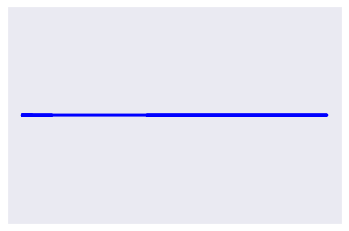

In [185]:
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictionsLR, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
  
compare = pd.DataFrame(np.transpose(np.array([np.array(test_labels),predictionsLR])),
                       columns=['Actual','Predicted'])
plt.scatter(compare['Predicted'],compare['Actual'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure()
plt.hist([compare['Predicted'],compare['Actual']], alpha=0.5, label=['Predicted','Actual'])
plt.legend(loc='upper right')
plt.show()